In [1]:
import streamlit as st
from datetime import date
import yfinance as yf
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from plotly import graph_objs as go
import numpy as np


In [2]:
#date range

START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")
#title
st.title("Just 2 Traders predictions")
#stocks
stocks = ("AAPL","GOOG", "MSFT")
selected_stock = st.selectbox("Stock to hunt",stocks)
#time analysis
n_years = st.slider("Time", 1, 4)
period = n_years * 7





2021-12-19 15:42:29.316 
  command:

    streamlit run C:\Users\user\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [3]:
#data function


def load_data(ticker):
    data = yf.download(ticker,START,TODAY)
    data.reset_index(inplace=True)
    return data

#data output
data_load_state = st.text("Hunting the market")
data = load_data(selected_stock)
data_load_state.text("Finished hunting")


2021-12-19 15:42:29.843 NumExpr defaulting to 8 threads.


[*********************100%***********************]  1 of 1 completed


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [4]:
#subheader
st.subheader("Raw meat")
st.write(data.tail())

#plot function
def plot_raw_meat_data():
    fig = go.Figure()
    #fig.add_trace(go.Scatter(x=data["Date"], y=date["Open"], name = "Stock open"))
    #fig.add_trace(go.Scatter(x=data["Date"], y=date["Close"], name = "Stock close"))
    fig.layout.update(title_text="Time analysis", xaxis_rangeslider_visible=True)
    st.plotly_chart(fig)
    
plot_raw_meat_data()



In [5]:
#forecasting
df_train = data[["Date", "Close"]]
df_train = df_train.rename(columns = {"Date": "ds", "Close": "y" })

m = Prophet()
m.fit(df_train)
future = m.make_future_dataframe(periods=period)
forecast = m.predict(future)

st.subheader("Raw meat forecast")
st.write(forecast.tail())



2021-12-19 15:42:31.515 Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


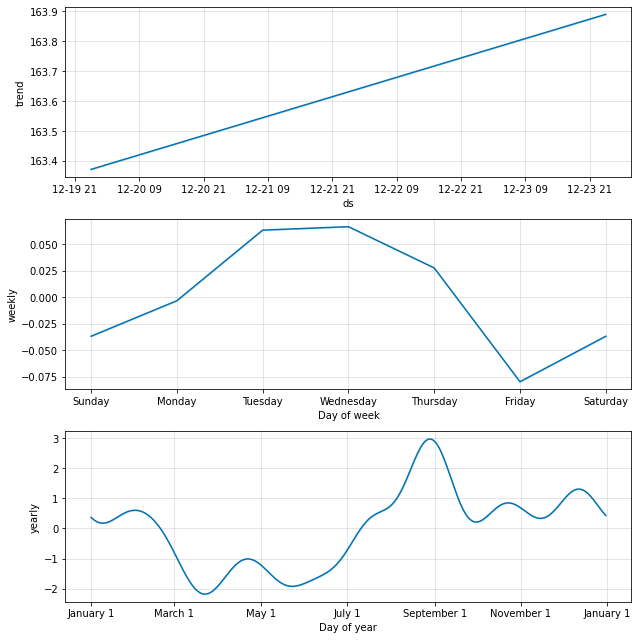

In [6]:
#forecast plot
st.write("Hunt outcome")
fig1 = plot_plotly(m, forecast)
st.plotly_chart(fig1)

st.write("Hunt components")
fig2 = m.plot_components(forecast.tail())